In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
J = pd.read_csv('jobs_in_data.csv')

In [3]:
J.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
J['employee_residence'].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Czech Republic',
       'Netherlands', 'Pakistan', 'Ukraine', 'Lithuania', 'Portugal',
       'Australia', 'Uganda', 'Colombia', 'Italy', 'Slovenia', 'Romania',
       'Greece', 'India', 'Latvia', 'Mauritius', 'Armenia', 'Croatia',
       'Thailand', 'South Korea', 'Estonia', 'Turkey', 'Philippines',
       'Brazil', 'Qatar', 'Russia', 'Kenya', 'Tunisia', 'Ghana',
       'Belgium', 'Switzerland', 'Andorra', 'Ecuador', 'Peru', 'Mexico',
       'Moldova', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Egypt',
       'Uzbekistan', 'Georgia', 'Central African Republic', 'Finland',
       'Austria', 'Singapore', 'Sweden', 'Kuwait', 'Cyprus',
       'Bosnia and Herzegovina', 'Iran', 'American Samoa', 'China',
       'Costa Rica', 'Chile', 'Puerto Rico', 'Denmark', 'Bolivia',
       'Dominican Republic', 'Indonesia', 'United Arab Emirates',
       'Malaysia', 'Japan', 'Hond

In [5]:
J['employee_residence'].nunique()

83

In [6]:
J['experience_level'].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [7]:
J[J['work_year']==2020]['experience_level'].value_counts()

experience_level
Mid-level      29
Entry-level    20
Senior         18
Executive       4
Name: count, dtype: int64

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


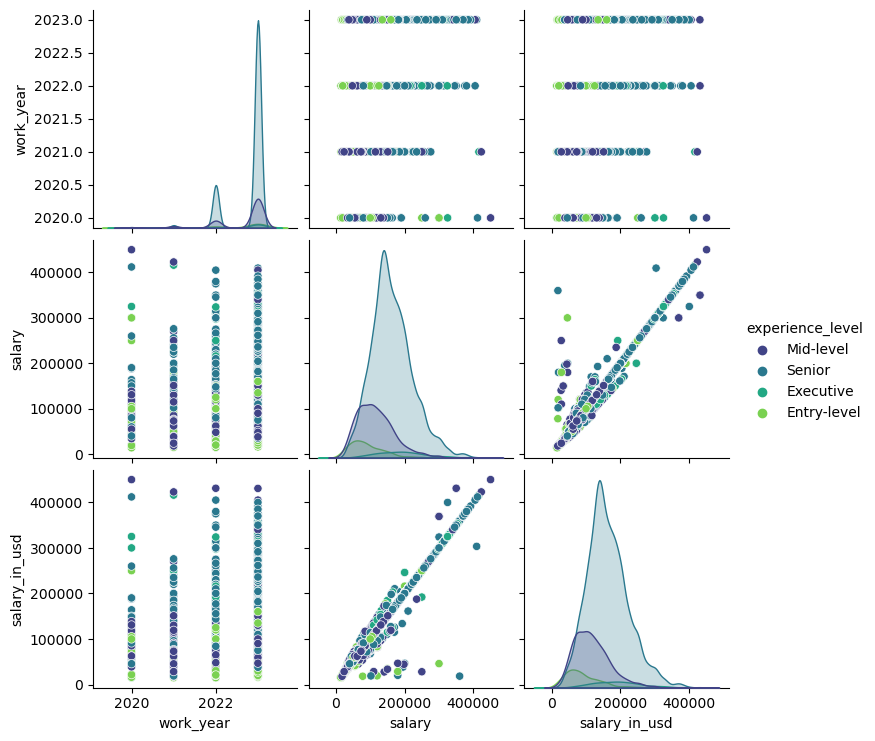

In [8]:
sns.pairplot(J,hue='experience_level' ,palette="viridis")

In [15]:
J[J['work_year']==2020]['experience_level'].value_counts()

experience_level
Mid-level      29
Entry-level    20
Senior         18
Executive       4
Name: count, dtype: int64

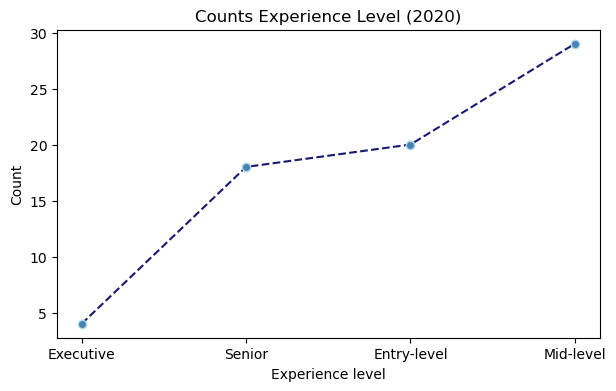

In [38]:
JW = J[J['work_year']==2020]['experience_level'].value_counts()
JW.sort_values(ascending=True, inplace=True)
x = JW.index
y = JW

plt.figure(figsize=[7,4])
plt.plot(x,y,'--',marker='o',mec='#ADD8E6',mfc='#4682B4',color='#191970')
plt.title('Counts Experience Level (2020)')
plt.xlabel('Experience level')
plt.ylabel('Count')

plt.show()

<Axes: xlabel='salary_in_usd', ylabel='Count'>

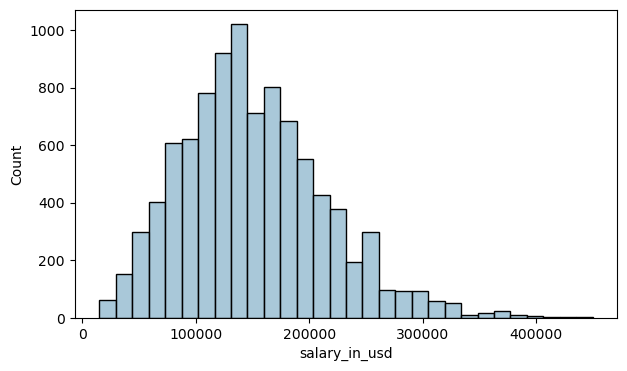

In [17]:
plt.figure(figsize=[7,4])
sns.histplot(J['salary_in_usd'],bins=30,color ="#8DB6CD")

In [18]:
J['job_category'].nunique()

10

In [24]:
 J[J['work_year']==2023]['job_category'].value_counts().head()

job_category
Data Science and Research    2413
Data Engineering             1699
Machine Learning and AI      1195
Data Analysis                1125
Leadership and Management     414
Name: count, dtype: int64

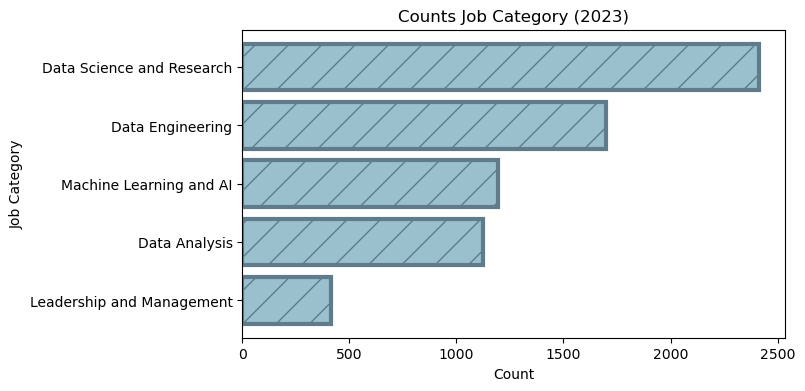

In [37]:
J1 = J[J['work_year']==2023]['job_category'].value_counts().head().sort_values()
x = J1.index
y = J1

plt.figure(figsize=[7,4])
plt.barh(x,y,color='#9AC0CD',hatch='/',ec='#607B8B',lw=3)
plt.title('Counts Job Category (2023)')
plt.xlabel('Count')
plt.ylabel('Job Category')

plt.show()

In [26]:
 data = J[J['job_title']=='Data Scientist']

In [27]:
data[data['work_year']==2020]['job_title'].value_counts()

job_title
Data Scientist    19
Name: count, dtype: int64

In [28]:
data[data['job_title']=='Data Scientist'].groupby('work_year').sum()['salary_in_usd']

work_year
2020      1729165
2021      2983023
2022     55134580
2023    251791771
Name: salary_in_usd, dtype: int64

In [29]:
arr_J = {}
for i in range(0,data['job_title'].nunique()) :
    arr_J[data['job_title'].unique()[i]] = data[ data['job_title']== data['job_title'].unique()[i] ].groupby('work_year').sum()['salary_in_usd']

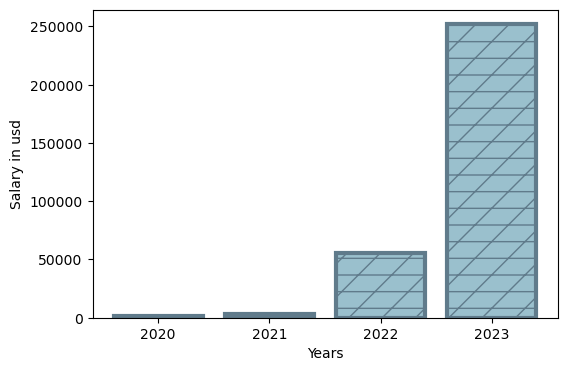

In [39]:
x = arr_J['Data Scientist'].index
y = arr_J['Data Scientist']//1000

plt.figure(figsize=[6,4])
plt.bar(x,y,color='#9AC0CD',hatch='/-',ec='#607B8B',lw=3)
plt.xticks([2020,2021,2022,2023])
plt.xlabel('Years')
plt.ylabel('Salary in usd')

plt.show()

In [31]:
att = J[['salary_in_usd', 'work_year']]
label = J['experience_level']

att_train, att_test, label_train, label_test = train_test_split(att, label, random_state = 0, train_size = 0.75)

scaler = StandardScaler()
scaler.fit(att_train)
att_train[[ 'salary_in_usd', 'work_year']] = scaler.transform(att_train)

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(att_train, label_train)

print(model.score(scaler.transform(att_test), label_test))

result = pd.concat([att_test,label_test],axis =1)
result['predict'] = model.predict(scaler.transform(att_test))
result

0.6840530141085934


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,salary_in_usd,work_year,experience_level,predict
8584,95000,2022,Senior,Senior
8027,225000,2022,Senior,Senior
4194,18381,2023,Senior,Entry-level
5899,200000,2023,Senior,Senior
587,110000,2023,Senior,Mid-level
...,...,...,...,...
8670,188100,2022,Senior,Senior
1413,122400,2023,Senior,Senior
8825,164996,2022,Senior,Senior
4160,166364,2023,Senior,Senior


In [32]:
att = J[['salary_in_usd', 'work_year']]
label = J['company_size']

att_train, att_test, label_train, label_test = train_test_split(att, label, random_state = 0, train_size = 0.75)

scaler = StandardScaler()
scaler.fit(att_train)
att_train[['salary_in_usd', 'work_year']] = scaler.transform(att_train)

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(att_train, label_train)

print(model.score(scaler.transform(att_test), label_test))

result = pd.concat([att_test,label_test],axis =1)
result['predict'] = model.predict(scaler.transform(att_test))
result

0.9144933732364259


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,salary_in_usd,work_year,company_size,predict
8584,95000,2022,M,M
8027,225000,2022,M,M
4194,18381,2023,L,L
5899,200000,2023,M,M
587,110000,2023,M,M
...,...,...,...,...
8670,188100,2022,M,M
1413,122400,2023,M,M
8825,164996,2022,M,M
4160,166364,2023,M,M
